# Introdução

## Algoritmos Genéticos

Algoritmos Genéticos pertencem a uma classe da Computação Natural que buscam inspiração na Teoria da Evolução por meio da Seleção Natural. Eles buscam soluções aproximadas de para problemas de otimização ou busca por meio de criação de uma população de indivíduos (que são solução candidatas), então aplica-se uma função de aptidão (fitness) que dirá qual indivíduo terá mais probabilidade de passar por uma Seleção Natural. Os indivíduos selecionados terão sua carga genética passada para a próxima geração, por meio de recombinação (crossover). Há ainda uma probabilidade de mutação aleatória para cada gene.

# Referencial Teórico




Desde a década de 50 pesquisadores propoem métodos de como tornar uma máquina inteligente, principalmente após a proposição do "Jogo da Imitação" por Alan Turing, em que define o que poderia ser uma máquina que pode pensar [1]. Houve várias propostas de como emular a estrutura do cérebro humano, como o neurônio de McCulloch-Pitts que simula o processamento de um neurônio e sua sinapse [2], mas o Algoritmo Genético trouxe a abordagem de emular a natureza em seu processo de evolução, por meio da seleção dos melhores indivíduos e cruzamento com herança genética [4]. John Holland argumenta que organismos vivos são resolvedores de problemas por natureza, e têm outro patamar comparados aos melhores programas [3].



[1] MACHINERY, Computing. Computing machinery and intelligence-AM Turing. Mind, v. 59, n. 236, p. 433, 1950.

[2] MCCULLOCH, Warren S.; PITTS, Walter. A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, v. 5, n. 4, p. 115-133, 1943.

[3]  HOLLAND, John H.; Genetic Algorithms: Computer programs that "evolve" in ways that resemble natural selection can solve complex problems even their creators do not fully understand, 2005.

[4] HOLLAND, John Henry. Adaptation in natural and artificial systems: an introductory analysis with applications to biology, control, and artificial intelligence. MIT press, 1992.

# Metodologia Experimental

Foi utilizado o dataset do MNIST para caracteres escritos a mão [5] presente no pacote Keras. Cada caractere é representado por uma matrix 28x28 de valores de 0 a 256, sendo o valor 0 a cor preta e 256 a cor branca. Para a utilização de técnicas binárias os valores menores de 128 foram mapeados para 0 e maiores ou iguais foram mapeados para 1. Foi realizada também o achatamento da matriz para um vetor de 784 posições.
Foram testadas várias funções de fitness, como a Distância Euclidiana e a porcentagem de acertos entre o caractere esperado e o individuo candidato, mas foi escolhido a função de similaridade por Cosseno por trabalhar bem tanto com dados binários quanto com númericos.
A função para seleção por roleta foi implementada, mas não gerou resultados que convergissem. Por isso a seleção utilizada foi baseada em elitismo, onde o melhor da geração tem uma probabilidade de 60% de cruzar com cada um dos indivíduos e gerar um filho ou 40% de se manter na próxima geração. O cruzamento entre os pais foi feito a partir de um ponto aleatório. Após o cruzamento é aplicado uma probabilidade de 1% de mutação aleatória usando o operador Creep Mutation, em que o gene será trocado por um valor aleatório entre seu mínimo e máximo [6], sendo esse valor 0 ou 1 quando utilizada opção binária ou de 0 a 256 quando utilizada em escala de cinza. 
Cada população teve 50 indivíduos gerados aleatoriamentes, e o Algoritmo foi usado em 5 experimentos.

[5] LECUN, Yann; CORTES, Corinna; BURGES, C. J. MNIST handwritten digit database. AT&T Labs [Online]. Available: http://yann. lecun. com/exdb/mnist, v. 2, 2010.
[6] SONI, Nitasha; KUMAR, Tapas. Study of various mutation operators in genetic algorithms. International Journal of Computer Science and Information Technologies, v. 5, n. 3, p. 4519-4521, 2014.

# Resultados e Discussão

Em todos os experimentos a população convergiu por volta da 350ª geração, passando da similaridade de cosseno de 0.90. Os resultados estabilizaram com similaridade de cosseno aproximadamente 0.92, tendo seu maior valor 0.92814 na geração 444 do experimento 2.
As medidas de fitness máximo e médio são apresentados na Figura 1 e 2, respectivamente.



## Figura 1: Fitness Máximo

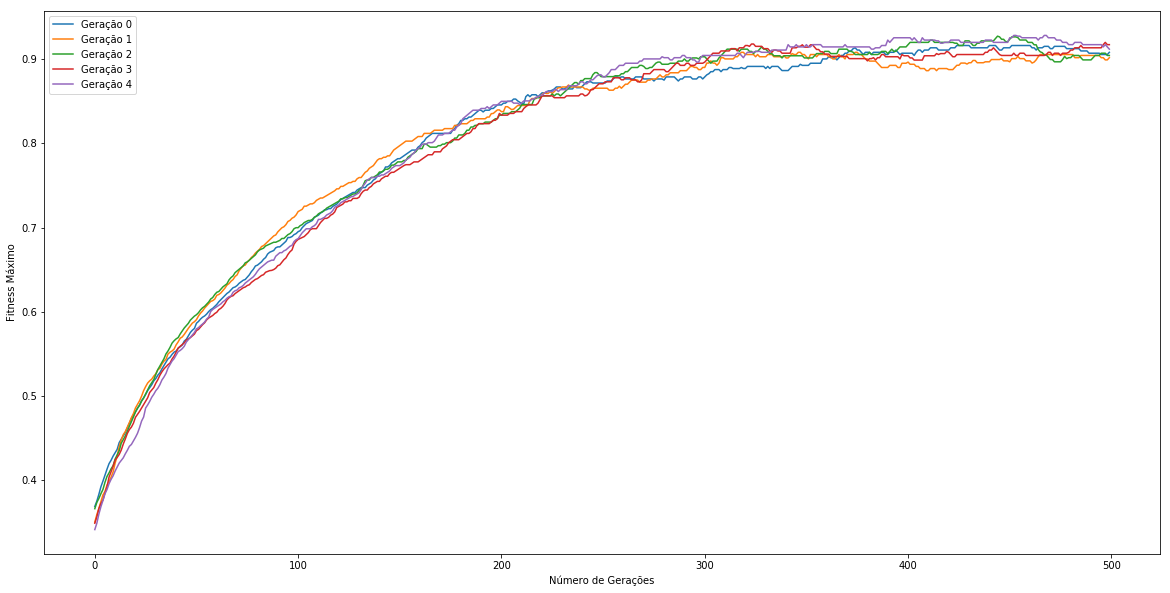

In [37]:
fitness_max = [[stat["fitness max"] for stat in statistics] for statistics in experiments]
plt.figure(figsize=(20,10))
plt.ylabel ("Fitness Máximo")
plt.xlabel ("Número de Gerações")
plt.plot (np.array(fitness_max).T)
plt.legend(["Experimento %d" % i for i in range (0, nExp)])

## Figura 2: Fitness Médio

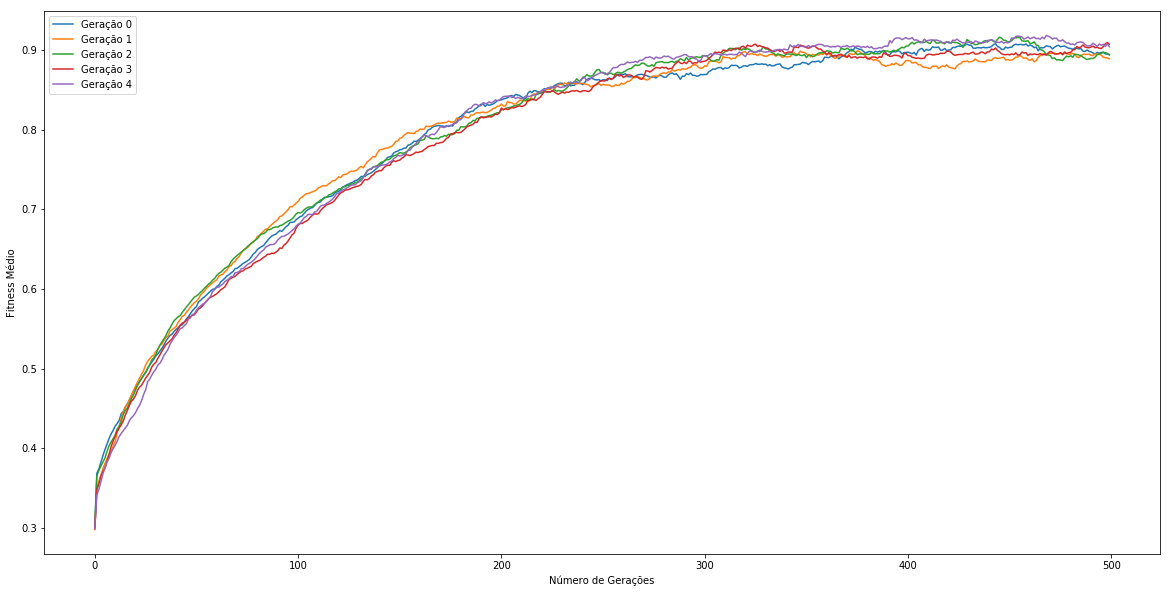

In [38]:
fitness_mean = [[stat["fitness mean"] for stat in statistics] for statistics in experiments]
plt.figure(figsize=(20,10))
plt.ylabel ("Fitness Médio")
plt.xlabel ("Número de Gerações")
plt.plot (np.array(fitness_mean).T)
plt.legend(["Experimento %d" % i for i in range (0, nExp)])

A pouca variabilidade genética dada pelo algoritmo de seleção pode explicar a demora na convergência e a estabilização em uma similaridade de 0.92. Testes futuros podem testar o uso de outros algoritmos de seleção, como Seleção por Torneio ou Baseada em Recompensa. Também pode ser testado uma taxa de mutação maior quando houver estabilização dos resultados

## Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy import dot
from numpy.linalg import norm

/home/jupyterlab/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Carregar dataset e escolher character

In [7]:
mnist = tf.keras.datasets.mnist
data = mnist.load_data()
character = data[0][0][7]

11493376/11490434 [==============================] - 1s 0us/step


## Parâmetros do Algoritmo Genético

In [15]:
PC = 0.60
PM = 0.01
popSize = 50
nGen = 500
nExp = 5
binaryOnly = True

## Função de Fitness

In [16]:
def cos (a, b):
    return dot(a, b)/(norm(a)*norm(b))

def fitnessFunc (pop):
    return np.array([ cos(pop[i], vector) for i in range (0, popSize)])

## Função para gerar população

In [17]:
def generatePopulation (popSize):
    return [np.random.randint(np.max(vector + 1), size=len(vector)) for i in range (0, popSize)]

## Função para imprimir o caracter

In [18]:
def printChar (char):
    pixels = np.array(char, dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

## Gerar vetor de comparação

In [19]:
if binaryOnly:
    vector = np.array([1 if number > 127 else 0 for number in character.flatten()])
else:
    vector =  character.flatten()

## Imprimir vetor original

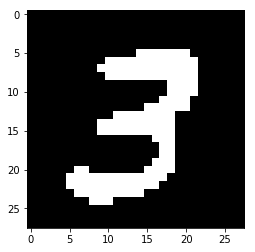

In [23]:
printChar(vector)

## Rodar Algoritmo Genético

Experimento :  0
Geração 0: 
Fitness: 0.36388


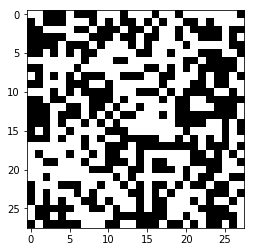

Geração 50: 
Fitness: 0.59278


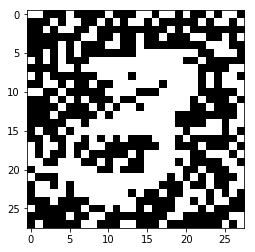

Geração 100: 
Fitness: 0.69980


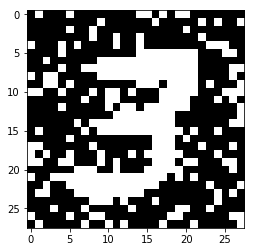

Geração 150: 
Fitness: 0.77190


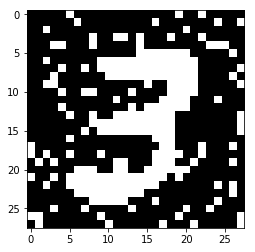

Geração 200: 
Fitness: 0.82936


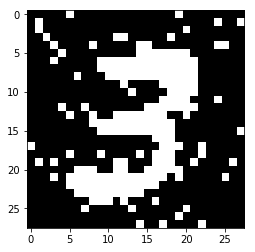

Geração 250: 
Fitness: 0.87780


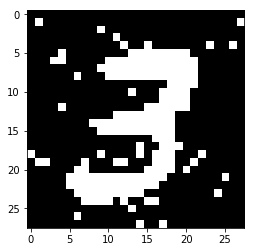

Geração 300: 
Fitness: 0.88377


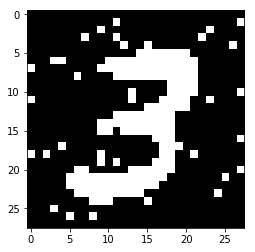

Geração 350: 
Fitness: 0.89906


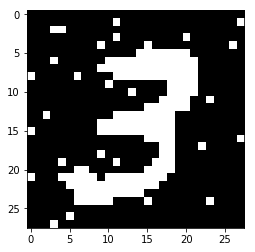

Geração 400: 
Fitness: 0.92814


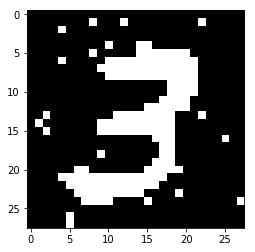

Geração 450: 
Fitness: 0.91987


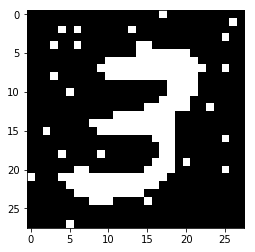

Geração 499: 
Fitness: 0.91889


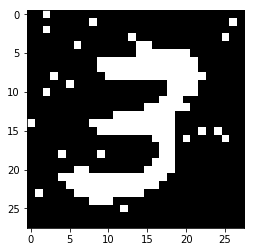

Experimento :  1
Geração 0: 
Fitness: 0.34502


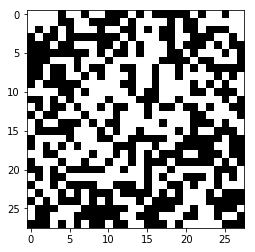

Geração 50: 
Fitness: 0.56584


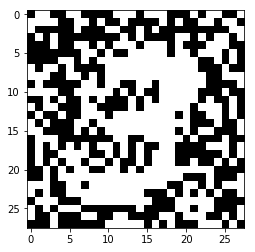

Geração 100: 
Fitness: 0.66800


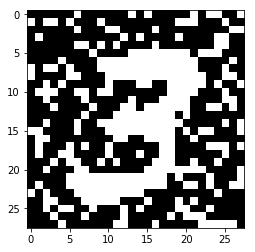

Geração 150: 
Fitness: 0.75330


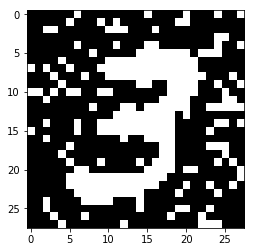

Geração 200: 
Fitness: 0.80992


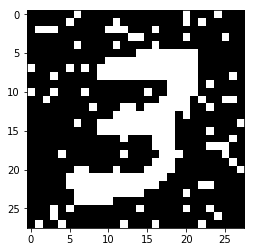

Geração 250: 
Fitness: 0.85995


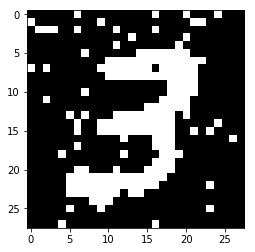

Geração 300: 
Fitness: 0.88248


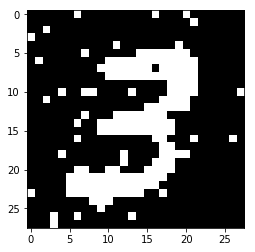

Geração 350: 
Fitness: 0.91074


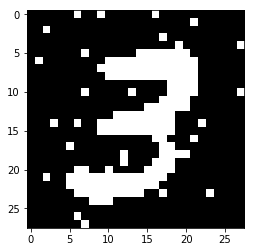

Geração 400: 
Fitness: 0.92260


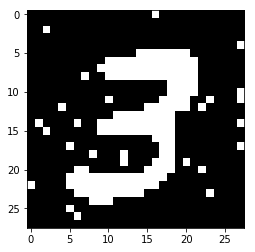

Geração 450: 
Fitness: 0.91716


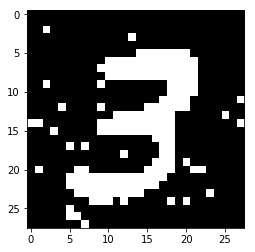

Geração 499: 
Fitness: 0.89764


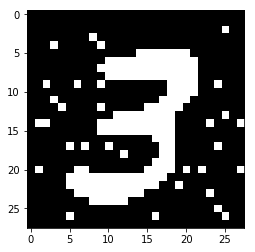

Experimento :  2
Geração 0: 
Fitness: 0.34934


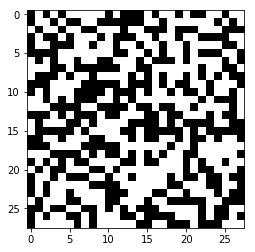

Geração 50: 
Fitness: 0.58832


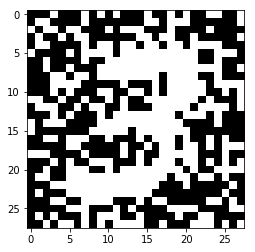

Geração 100: 
Fitness: 0.67772


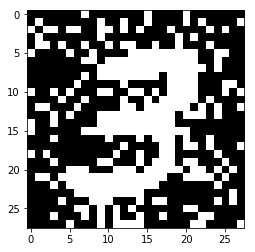

Geração 150: 
Fitness: 0.76491


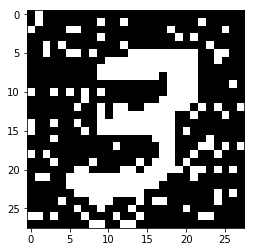

Geração 200: 
Fitness: 0.83966


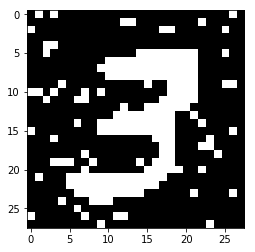

Geração 250: 
Fitness: 0.87447


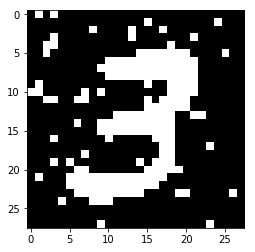

Geração 300: 
Fitness: 0.89508


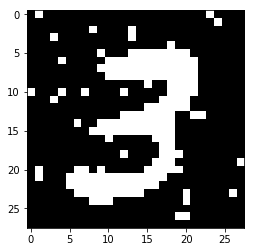

Geração 350: 
Fitness: 0.91793


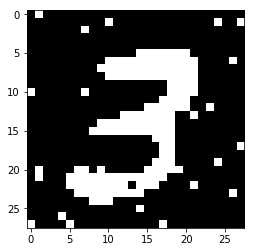

Geração 400: 
Fitness: 0.93296


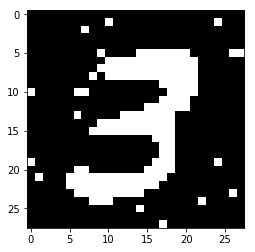

Geração 450: 
Fitness: 0.91516


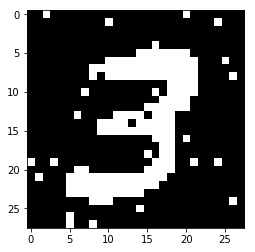

Geração 499: 
Fitness: 0.93216


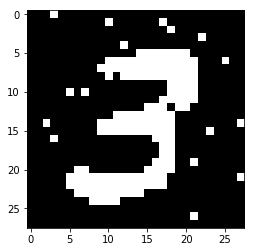

Experimento :  3
Geração 0: 
Fitness: 0.36801


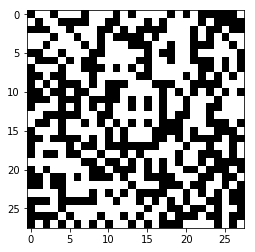

Geração 50: 
Fitness: 0.57989


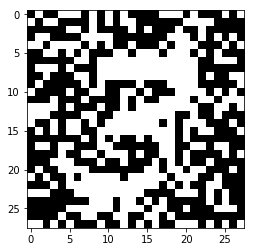

Geração 100: 
Fitness: 0.69610


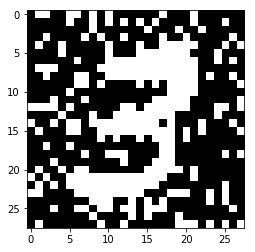

Geração 150: 
Fitness: 0.77134


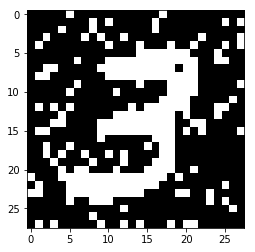

Geração 200: 
Fitness: 0.83412


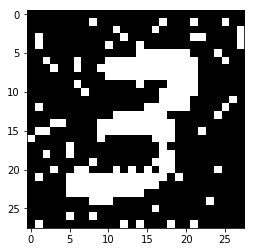

Geração 250: 
Fitness: 0.86456


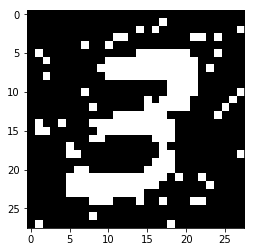

Geração 300: 
Fitness: 0.89380


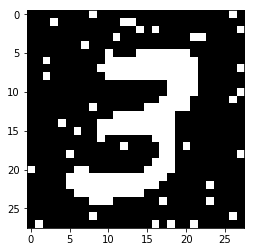

Geração 350: 
Fitness: 0.90543


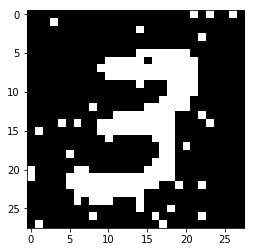

Geração 400: 
Fitness: 0.90970


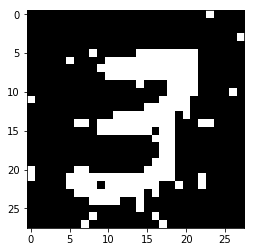

Geração 450: 
Fitness: 0.93095


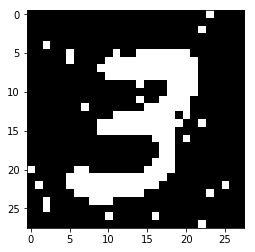

Geração 499: 
Fitness: 0.92639


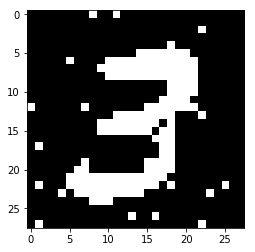

Experimento :  4
Geração 0: 
Fitness: 0.34704


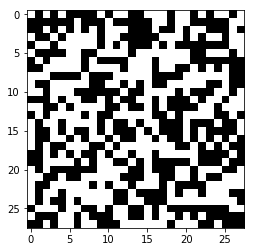

Geração 50: 
Fitness: 0.58464


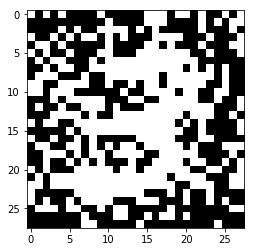

Geração 100: 
Fitness: 0.68361


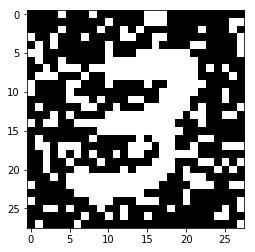

Geração 150: 
Fitness: 0.77842


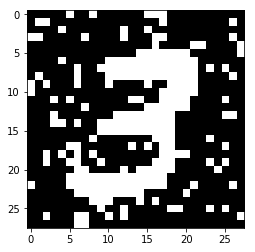

Geração 200: 
Fitness: 0.84389


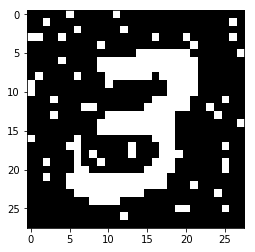

Geração 250: 
Fitness: 0.85613


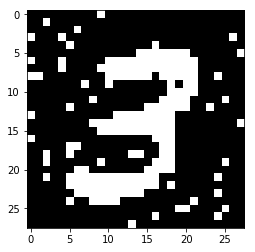

Geração 300: 
Fitness: 0.87885


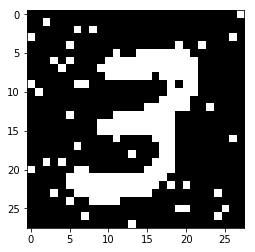

Geração 350: 
Fitness: 0.90281


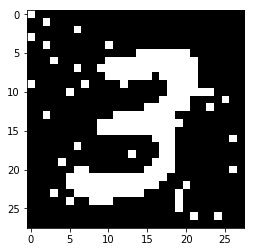

Geração 400: 
Fitness: 0.90655


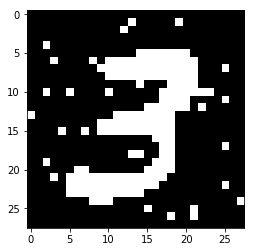

Geração 450: 
Fitness: 0.89631


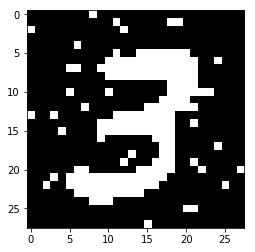

Geração 499: 
Fitness: 0.90396


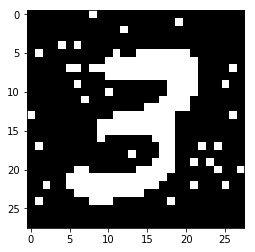

In [21]:
experiments = []
for exp in range (0, nExp):
    print ("Experimento : ", exp)
    pop = generatePopulation(popSize)
    statistics = []
    for i in range (0, nGen):    
        fitness = fitnessFunc (pop)

        stat = {}
        stat["fitness max"] =  np.max (fitness)
        stat["fitness mean"] = np.mean (fitness)

        statistics.append (stat)

        if i % 50 == 0 or i == nGen - 1:
            print("Geração %i: \nFitness: %.5f" % (i, np.max(fitness)))
            printChar (pop[np.argmax (fitness)])

        crossover = []
        sorted = np.argsort(-fitness)
        pai1 = pop[sorted[0]]
        
        for i in range (0, int(popSize)):            
            pai2 = pop[sorted[i]]
            if np.random.rand() <= PM:
                point = np.random.randint (len(vector))
                filho1 = np.concatenate((pai1[:point], pai2[point:])) 
                crossover.append (filho1)
            else:
                crossover.append(pai1)

        pop = np.array([[np.random.randint(2) if np.random.rand() <= PM else gene for gene in elem] for elem in crossover]) 
    experiments.append (statistics)

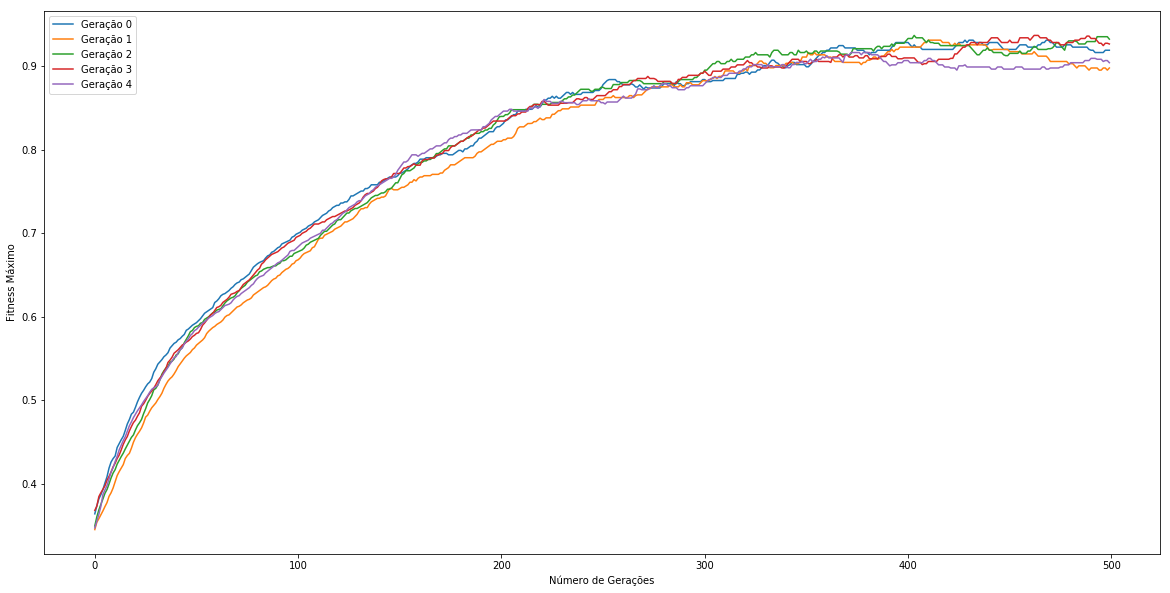

In [22]:
fitness_max = [[stat["fitness max"] for stat in statistics] for statistics in experiments]
plt.figure(figsize=(20,10))
plt.ylabel ("Fitness Máximo")
plt.xlabel ("Número de Gerações")
plt.plot (np.array(fitness_max).T)
plt.legend(["Geração %d" % i for i in range (0, nExp)])

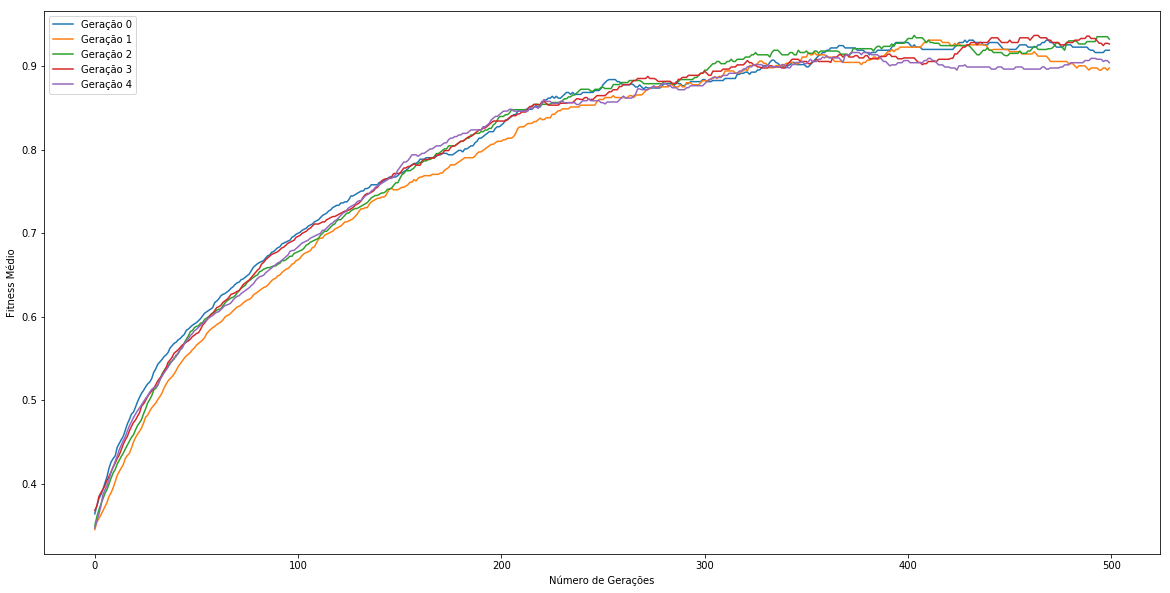

In [24]:
fitness_mean = [[stat["fitness mean"] for stat in statistics] for statistics in experiments]
plt.figure(figsize=(20,10))
plt.ylabel ("Fitness Médio")
plt.xlabel ("Número de Gerações")
plt.plot (np.array(fitness_max).T)
plt.legend(["Geração %d" % i for i in range (0, nExp)])